# EDA

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv('cancer_reg.csv')

In [3]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [5]:
data.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [6]:
data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

PctEmployed16_Over= (100- (PctBachDeg18_24+PctHS18_24+PctNoHS18_24))

In [7]:
data['sum_edu']=data['PctBachDeg18_24']+data['PctHS18_24']+data['PctNoHS18_24']

In [8]:
data['sum_edu']=100-data['sum_edu']

In [9]:
data['PctSomeCol18_24']=data['PctSomeCol18_24'].fillna(data['sum_edu'])

In [10]:
data[['PctEmployed16_Over', 'PctUnemployed16_Over','povertyPercent']]

,PctEmployed16_Over,PctUnemployed16_Over,povertyPercent
0,51.9,8.0,11.2
1,55.9,7.8,18.6
2,45.9,7.0,14.6
3,48.3,12.1,17.1
4,48.2,4.8,12.5
...,...,...,...
3042,51.7,4.3,12.4
3043,70.1,4.6,18.8
3044,64.8,6.4,15.0
3045,NaN,6.9,13.3


In [11]:
#filling mean values for the missing values
data[data['PctEmployed16_Over'].isna()]['MedianAge'].describe()

count    152.000000
mean      48.471053
std       58.715825
min       24.400000
25%       37.650000
50%       40.800000
75%       43.800000
max      511.200000
Name: MedianAge, dtype: float64

In [12]:
data[data['MedianAge']==48]['PctEmployed16_Over'].describe()

count     9.000000
mean     54.511111
std       8.137328
min      44.900000
25%      46.000000
50%      56.200000
75%      59.100000
max      65.600000
Name: PctEmployed16_Over, dtype: float64

In [13]:
data['PctEmployed16_Over'].describe()

count    2895.000000
mean       54.152642
std         8.315064
min        17.600000
25%        48.600000
50%        54.500000
75%        60.300000
max        80.100000
Name: PctEmployed16_Over, dtype: float64

In [14]:
data['PctEmployed16_Over'].fillna(54.15,inplace=True)

In [15]:
#removing PctPrivateCoverageAlone
data[['PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone']].head()

,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone
0,75.1,NaN,41.6,32.9,14.0
1,70.2,53.8,43.6,31.1,15.3
2,63.7,43.5,34.9,42.1,21.1
3,58.4,40.3,35.0,45.3,25.0
4,61.6,43.9,35.1,44.0,22.7


In [16]:
data.drop(['PctPrivateCoverageAlone'],inplace=True,axis=1)

In [17]:
data.corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,sum_edu
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508,0.138698
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420,0.118663
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407,-0.162756
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181,0.087773
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195,0.166841
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740,0.116168
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283,-0.130394
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676,0.087343
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276,-0.039323
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105,-0.259112


In [18]:
data.nunique()

avgAnnCount                929
avgDeathsPerYear           608
TARGET_deathRate          1053
incidenceRate             1506
medIncome                 2920
popEst2015                2999
povertyPercent             333
studyPerCap               1117
binnedInc                   10
MedianAge                  325
MedianAgeMale              298
MedianAgeFemale            296
Geography                 3047
AvgHouseholdSize           199
PercentMarried             362
PctNoHS18_24               405
PctHS18_24                 469
PctSomeCol18_24            878
PctBachDeg18_24            219
PctHS25_Over               361
PctBachDeg25_Over          281
PctEmployed16_Over         410
PctUnemployed16_Over       195
PctPrivateCoverage         498
PctEmpPrivCoverage         450
PctPublicCoverage          395
PctPublicCoverageAlone     319
PctWhite                  3044
PctBlack                  2972
PctAsian                  2852
PctOtherRace              2903
PctMarriedHouseholds      3043
BirthRat

In [19]:
data.drop(['Geography'],inplace=True,axis=1)
#unique object type data

In [20]:
data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'sum_edu'],
      dtype='object')

In [21]:
#removing extra added column
data.drop(['sum_edu'],inplace=True,axis=1)

In [22]:
data.shape

(3047, 32)

vizualising correlation

<AxesSubplot:>

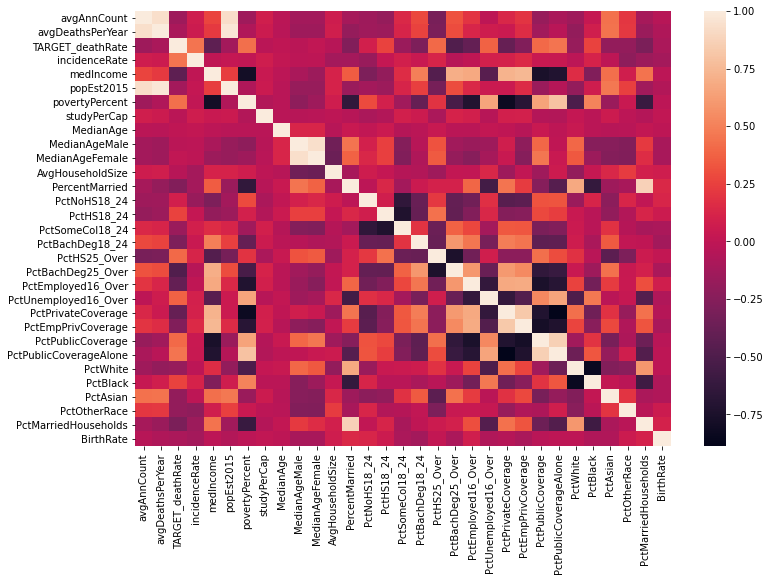

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

In [24]:
corr_matrix=data.corr()

In [25]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.90)]
to_drop

<ipython-input-25-c52e80fff3d9>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['avgDeathsPerYear', 'popEst2015', 'MedianAgeFemale']

In [26]:
#removing highly correlated data
data.drop(['avgDeathsPerYear', 'popEst2015', 'MedianAgeFemale'],inplace=True,axis=1)

In [27]:
data.shape

(3047, 29)

In [28]:
data.isna().sum()

avgAnnCount               0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctSomeCol18_24           0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

In [29]:
data.duplicated().sum()

0

In [30]:
data.binnedInc.value_counts()

(54545.6, 61494.5]    306
(45201, 48021.6]      306
[22640, 34218.1]      306
(48021.6, 51046.4]    305
(51046.4, 54545.6]    305
(42724.4, 45201]      305
(34218.1, 37413.8]    304
(37413.8, 40362.7]    304
(40362.7, 42724.4]    304
(61494.5, 125635]     302
Name: binnedInc, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [32]:
#encoding object type data
data['binnedInc']=lbl.fit_transform(data['binnedInc'])

# vizualisation

array([[<AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>]], dtype=object)

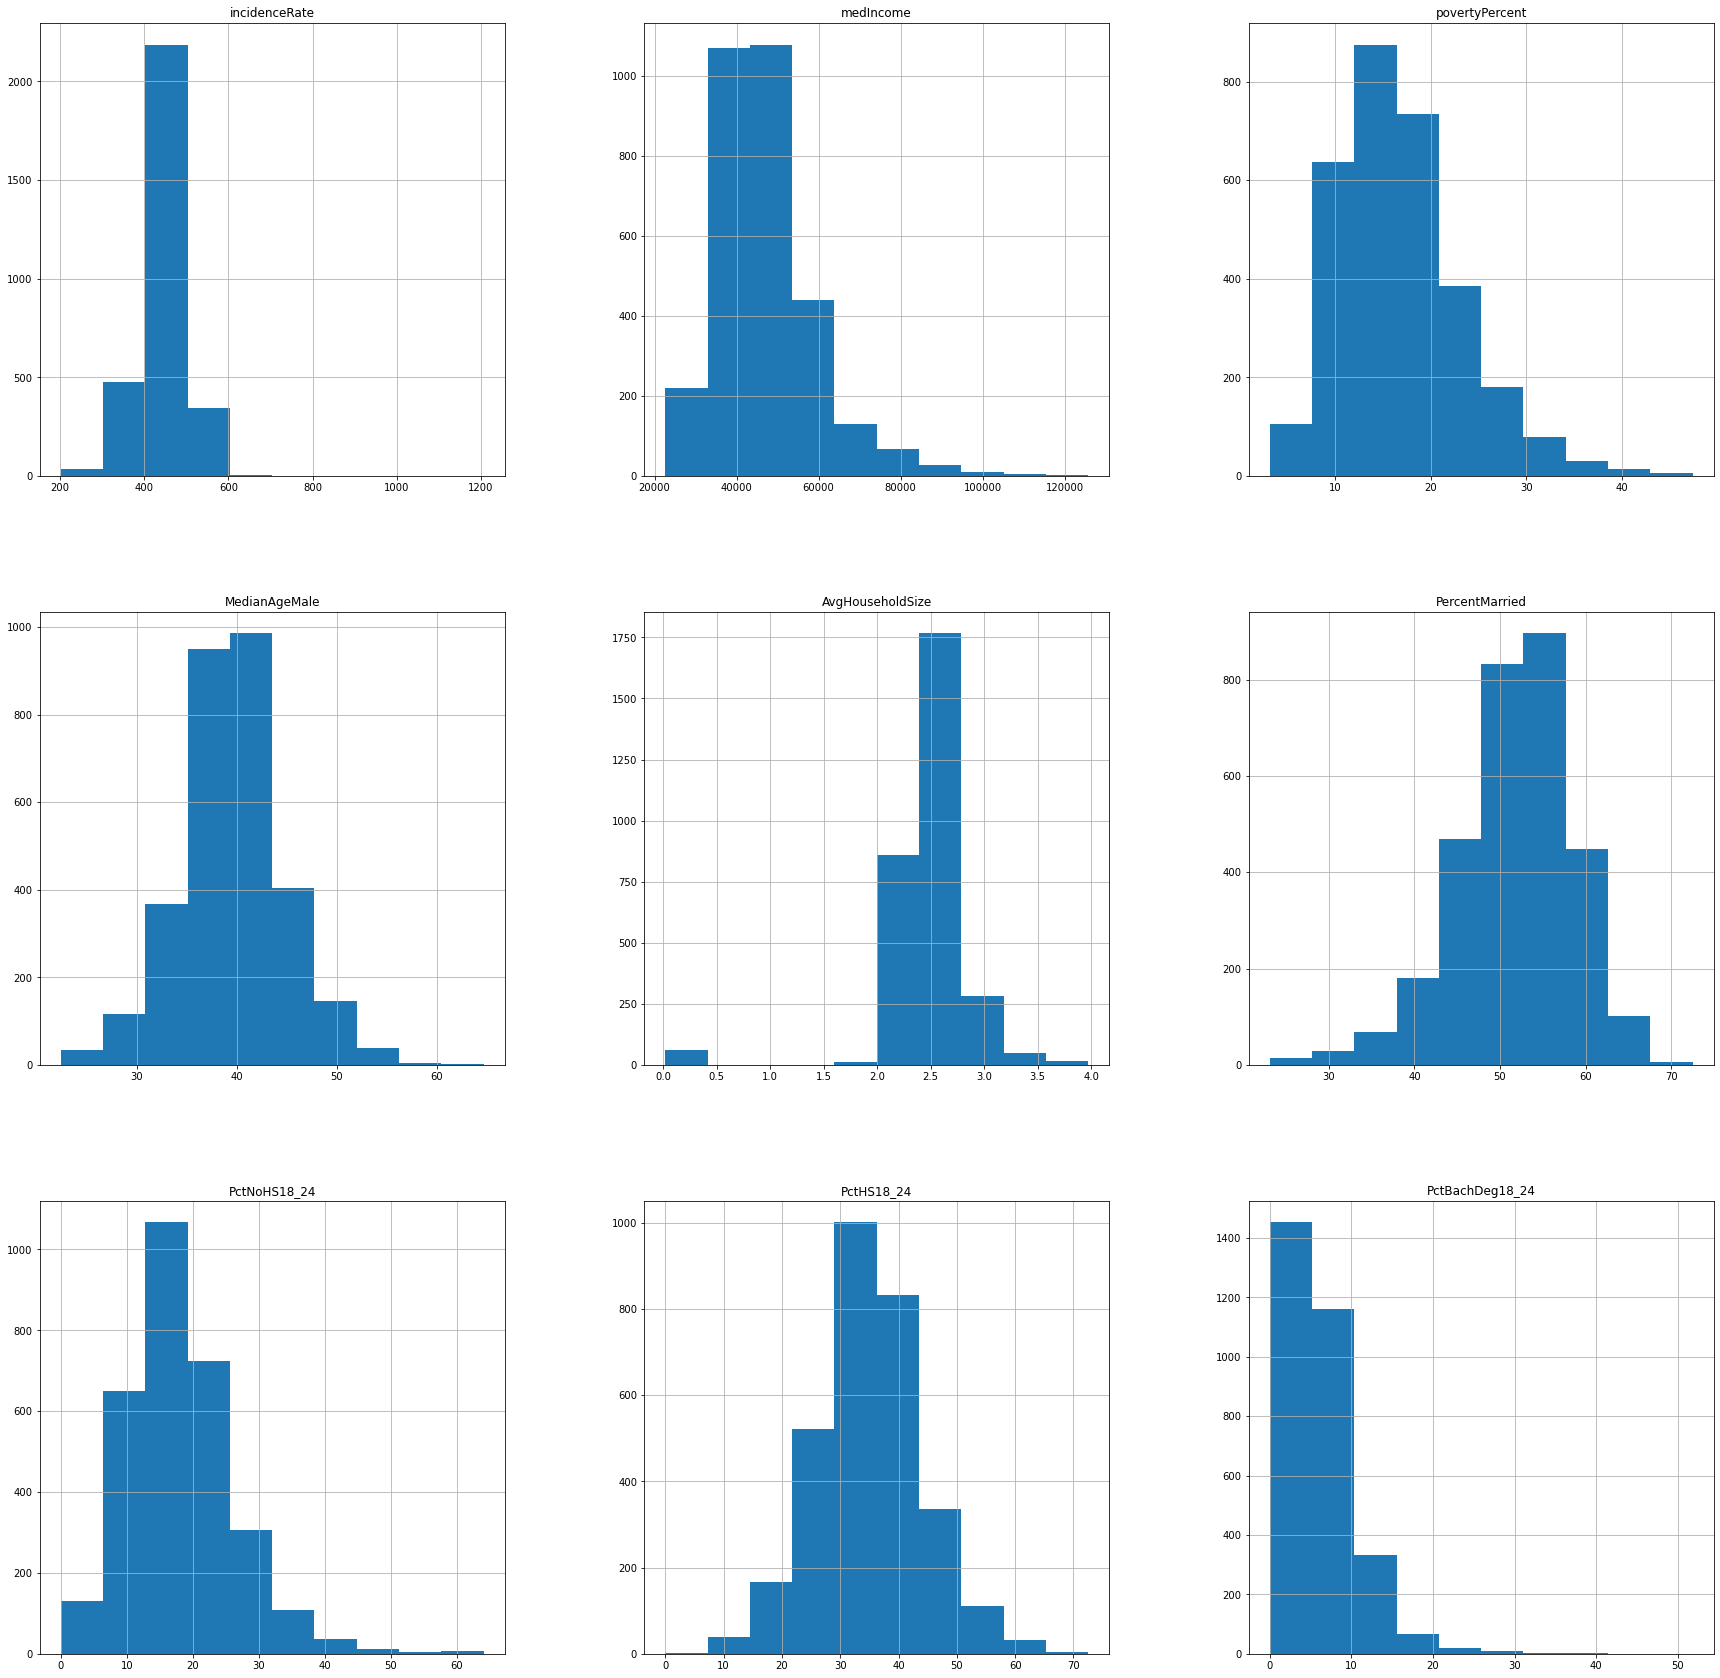

In [33]:
data.hist(['incidenceRate', 'medIncome',
       'povertyPercent', 'MedianAgeMale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24'], figsize=(30,30))

array([[<AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_Over'}>,
        <AxesSubplot:title={'center':'PctEmployed16_Over'}>,
        <AxesSubplot:title={'center':'binnedInc'}>],
       [<AxesSubplot:title={'center':'PctUnemployed16_Over'}>,
        <AxesSubplot:title={'center':'PctPrivateCoverage'}>,
        <AxesSubplot:title={'center':'PctEmpPrivCoverage'}>,
        <AxesSubplot:title={'center':'PctPublicCoverage'}>],
       [<AxesSubplot:title={'center':'PctPublicCoverageAlone'}>,
        <AxesSubplot:title={'center':'PctWhite'}>,
        <AxesSubplot:title={'center':'PctBlack'}>,
        <AxesSubplot:title={'center':'PctOtherRace'}>],
       [<AxesSubplot:title={'center':'PctMarriedHouseholds'}>,
        <AxesSubplot:title={'center':'BirthRate'}>,
        <AxesSubplot:title={'center':'TARGET_deathRate'}>,
        <AxesSubplot:>]], dtype=object)

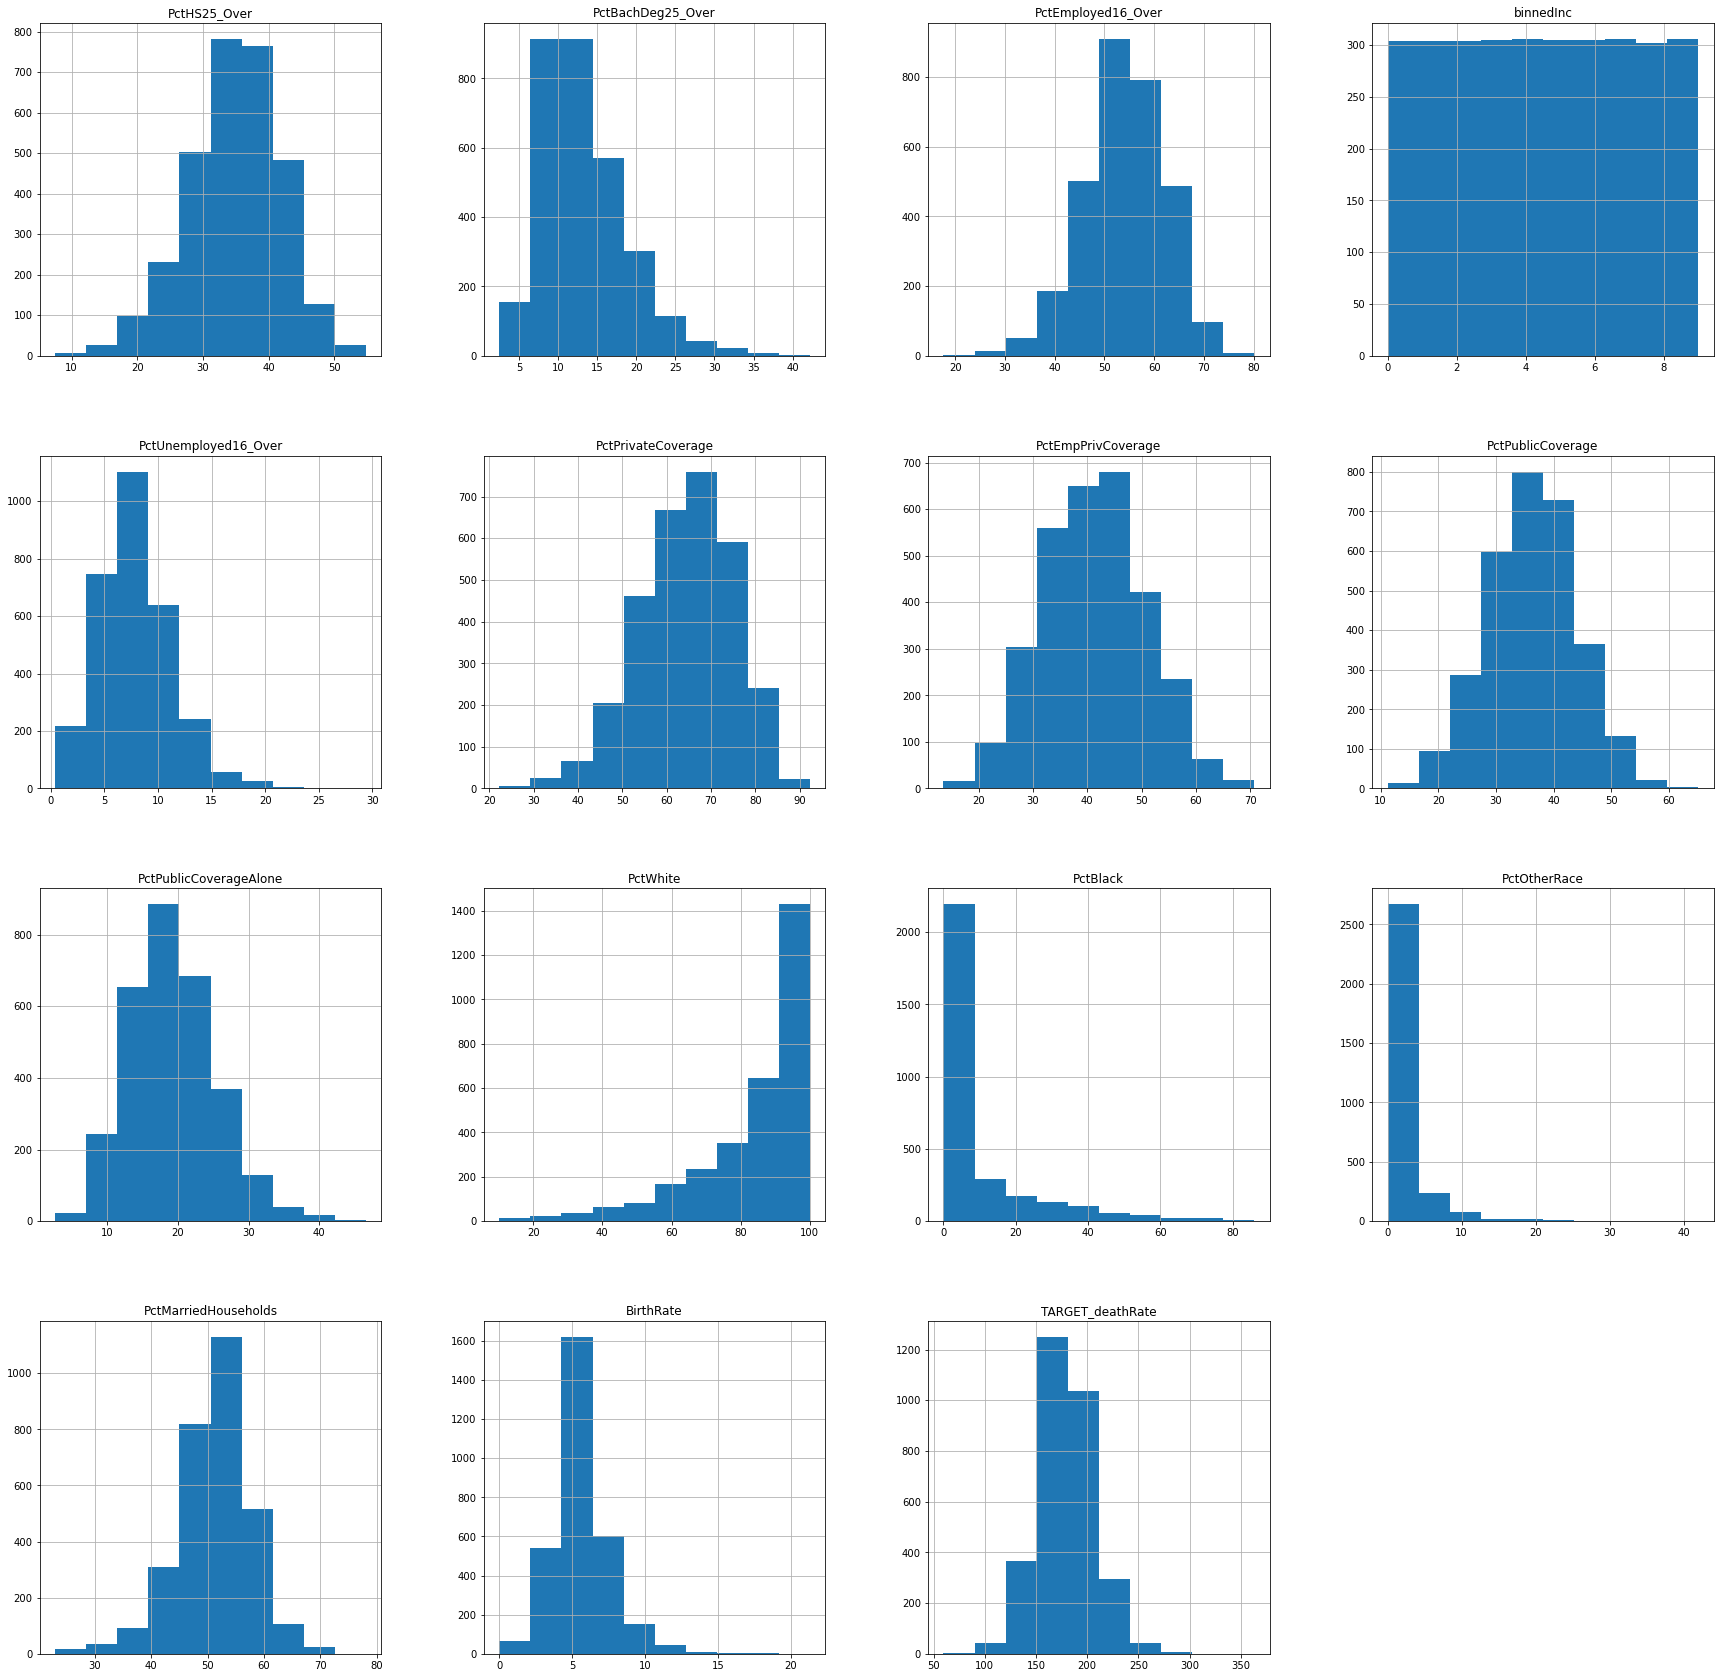

In [34]:
data.hist(['PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over','binnedInc',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'], figsize=(30,30))

In [35]:
data.columns

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome',
       'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
       'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [36]:
X=data[['avgAnnCount', 'incidenceRate', 'medIncome',
       'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
       'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]
y=data['TARGET_deathRate']

In [37]:
X.shape

(3047, 28)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2132, 28)
(2132,)
(915, 28)
(915,)


-> How to identify the right model for the problem.
-> it is an regression problem so i will use regression models to predict the outcome.

# linear regression

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lrRegModel = lr.fit(X_train, y_train)
lrPrediction = lrRegModel.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
print('R2 value', r2_score(y_train, lrRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-lrPrediction)/y_test))*100))

R2 value 0.5344430335903223
Accuracy 90.99600341155586


# decision tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6, criterion='mse')
dtRegModel = dt.fit(X_train, y_train)
dtPrediction = dtRegModel.predict(X_test)
print('R2 value', r2_score(y_train, dtRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-dtPrediction)/y_test))*100))

R2 value 0.6181775730951182
Accuracy 90.12065345609703


# Random forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=1, criterion='mse', n_estimators=100)
rfRegModel = rf.fit(X_train, y_train)
rfPrediction = rfRegModel.predict(X_test)
print('R2 value', r2_score(y_train, rfRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-rfPrediction)/y_test))*100))

R2 value 0.19999040274693458
Accuracy 88.252647792566


# Adaboost

In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
adab = AdaBoostRegressor(n_estimators=100, base_estimator=dt, learning_rate=0.1)
adabRegModel = adab.fit(X_train, y_train)
adabPrediction = adabRegModel.predict(X_test)
print('R2 value', r2_score(y_train, adabRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-adabPrediction)/y_test))*100))

R2 value 0.24950880403952735
Accuracy 88.44013371586118


# Xgboost

In [45]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, max_depth=7, learning_rate=0.2, booster='gbtree')
xgbRegModel = xgb.fit(X_train, y_train)
xgbPrediction = xgbRegModel.predict(X_test)
print('R2 value', r2_score(y_train, xgbRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-xgbPrediction)/y_test))*100))

R2 value 0.9999999985511083
Accuracy 91.00423003735638


# Finding best set of parameters using grid search

In [46]:
def LinearRegressionParams(X_train, y_train, X_test, y_test):
    test_size_list = [0.2,0.25,0.3]
    random_state_list = [42,775,687]
    TrialNo = 0
    for Test_size in test_size_list:
        for Random_state in random_state_list:
            TrialNo+=1
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = Test_size, random_state = Random_state)
            lr = LinearRegression()
            lrRegModel = lr.fit(X_train, y_train)
            lrPrediction = lrRegModel.predict(X_test)
            print(TrialNo, 'Random_state', Random_state, '--> Test_size', Test_size, '--> Accuracy',100-(np.mean((np.abs(y_test-lrPrediction)/y_test))*100))

In [47]:
LinearRegressionParams(X_train, y_train, X_test, y_test)

1 Random_state 42 --> Test_size 0.2 --> Accuracy 91.22007773787566
2 Random_state 775 --> Test_size 0.2 --> Accuracy 91.70557452561546
3 Random_state 687 --> Test_size 0.2 --> Accuracy 91.77916276927887
4 Random_state 42 --> Test_size 0.25 --> Accuracy 91.11515839935768
5 Random_state 775 --> Test_size 0.25 --> Accuracy 91.55088889806389
6 Random_state 687 --> Test_size 0.25 --> Accuracy 91.5971410068777
7 Random_state 42 --> Test_size 0.3 --> Accuracy 90.99600341155586
8 Random_state 775 --> Test_size 0.3 --> Accuracy 91.68968821886233
9 Random_state 687 --> Test_size 0.3 --> Accuracy 91.68409248608545


In [48]:
# Random Forest
def RandomForestParams(X_train, y_train, X_test, y_test):
    test_size_list = [0.2,0.25,0.3]
    random_state_list = [42,775,687]
    N_Estimators_list = [500, 550, 600]
    TrialNo = 0
    for Test_size in test_size_list:
        for Random_state in random_state_list:
            for N_Estimators in N_Estimators_list:
                TrialNo+=1
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = Test_size, random_state = Random_state)
                rf = RandomForestRegressor(max_depth=1, criterion='mse', n_estimators=N_Estimators)
                rfRegModel = rf.fit(X_train, y_train)
                rfPrediction = rfRegModel.predict(X_test)
                Accuracy = 100-(np.mean((np.abs(y_test-rfPrediction)/y_test))*100)
                print(TrialNo, 'Random_state', Random_state,
                      '--> Test_size', Test_size, 'n_estimators',N_Estimators, '--> Accuracy', Accuracy)

In [49]:
RandomForestParams(X_train, y_train, X_test, y_test)

1 Random_state 42 --> Test_size 0.2 n_estimators 500 --> Accuracy 88.46450038095136
2 Random_state 42 --> Test_size 0.2 n_estimators 550 --> Accuracy 88.46182370132973
3 Random_state 42 --> Test_size 0.2 n_estimators 600 --> Accuracy 88.47882083835304
4 Random_state 775 --> Test_size 0.2 n_estimators 500 --> Accuracy 89.10203696413342
5 Random_state 775 --> Test_size 0.2 n_estimators 550 --> Accuracy 89.10896662728406
6 Random_state 775 --> Test_size 0.2 n_estimators 600 --> Accuracy 89.11916742761288
7 Random_state 687 --> Test_size 0.2 n_estimators 500 --> Accuracy 89.67935592377945
8 Random_state 687 --> Test_size 0.2 n_estimators 550 --> Accuracy 89.65941595150501
9 Random_state 687 --> Test_size 0.2 n_estimators 600 --> Accuracy 89.68444588006129
10 Random_state 42 --> Test_size 0.25 n_estimators 500 --> Accuracy 88.21994366856435
11 Random_state 42 --> Test_size 0.25 n_estimators 550 --> Accuracy 88.21305179739299
12 Random_state 42 --> Test_size 0.25 n_estimators 600 --> Accurac

# Artificial Neural Network

In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
model = Sequential()
model.add(Dense(units = 5, input_dim = 28, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'normal'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics='mean_absolute_error')

In [52]:
history=model.fit(X_train, y_train, verbose=1, batch_size=10, epochs=20)

Epoch 1/20
214/214 [==============================] - 0s 921us/step - loss: 5003.3623 - mean_absolute_error: 54.7133
Epoch 2/20
214/214 [==============================] - ETA: 0s - loss: 3305.6741 - mean_absolute_error: 44.882 - 0s 916us/step - loss: 3266.8284 - mean_absolute_error: 44.7067
Epoch 3/20
214/214 [==============================] - 0s 1ms/step - loss: 2985.0120 - mean_absolute_error: 42.7706
Epoch 4/20
214/214 [==============================] - 0s 1ms/step - loss: 2700.3250 - mean_absolute_error: 40.8163
Epoch 5/20
214/214 [==============================] - 0s 1ms/step - loss: 2091.4792 - mean_absolute_error: 35.9316
Epoch 6/20
214/214 [==============================] - 0s 859us/step - loss: 1233.5137 - mean_absolute_error: 27.2394
Epoch 7/20
214/214 [==============================] - 0s 798us/step - loss: 583.7791 - mean_absolute_error: 18.5421
Epoch 8/20
214/214 [==============================] - 0s 785us/step - loss: 491.6519 - mean_absolute_error: 16.7311
Epoch 9/20
214

In [53]:
pred=model.predict(X_test)

In [54]:
y_test = np.array(list(y_test))
y_pred = np.array(pred)
df4= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})

In [55]:
print('Accuracy', 100-(np.mean((np.abs(y_test-pred)/y_test))*100))

Accuracy 83.29983547799928
